# LDA-SVM

In [1]:
#import libraries

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd
"""
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})
"""

'\nplt.rcParams.update({\n    "text.usetex": True,\n    "font.family": "cmr"\n})\n'

In [2]:
# Load training data
#Need to be Soltani data
train_data = pd.read_csv("../TrainingData/neodata/soltani_all_noise_1200.csv")
test_data = pd.read_csv("../TestData/neodata/soltani_all_noise_100.csv")
vald_data=pd.read_csv("../ValidationData/neodata/soltani_all_noise_1200.csv")


In [3]:
#standardization
import standardization as sd
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)        #The function makes sure the target is not a part of the transformation
vald = standardizer.transform(vald_data)
tst = standardizer.transform(test_data)




# LDA    

Preserving 99.69% of variance


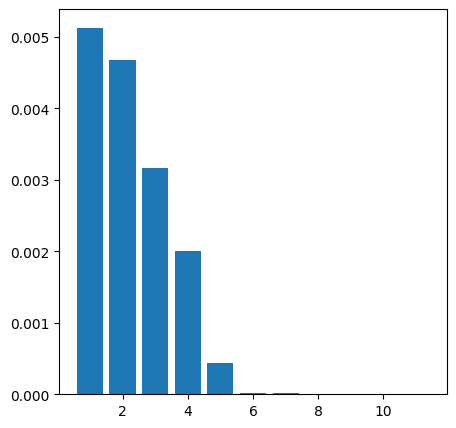

In [4]:
#Doing LDA transformation from 11 dimension to 5, by using a self implemented libary 
from lda import LDA_reducer as reducer
lda = reducer(trn,5,'target')


LDA_trn = lda.transform(trn)                    #The function makes sure the target is not a part of the projection
LDA_tst = lda.transform(tst)
LDA_vald = lda.transform(vald)


In [5]:
#Saves the eigenvalue plot
#plt.bar([x for x in range(1,11+1)],np.real(lda.eig_val[0:11]))
#plt.savefig("LDA-SVM_eigvalue.pdf", format="pdf", bbox_inches="tight")


# SVM

In [6]:
#Getting the labels for the training data:
targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_vald = vald_data['target']

#Training the SVM, on the 5 dimensional data, using sklearn
from sklearn import svm

clf_svm = svm.SVC( C=1000, decision_function_shape="ovo",gamma=0.01,verbose=True)
clf_svm.fit(LDA_trn.drop('target',axis=1), labels_trn)


[LibSVM]

SVC(C=1000, decision_function_shape='ovo', gamma=0.01, verbose=True)

# Confusion matrix for Validation data

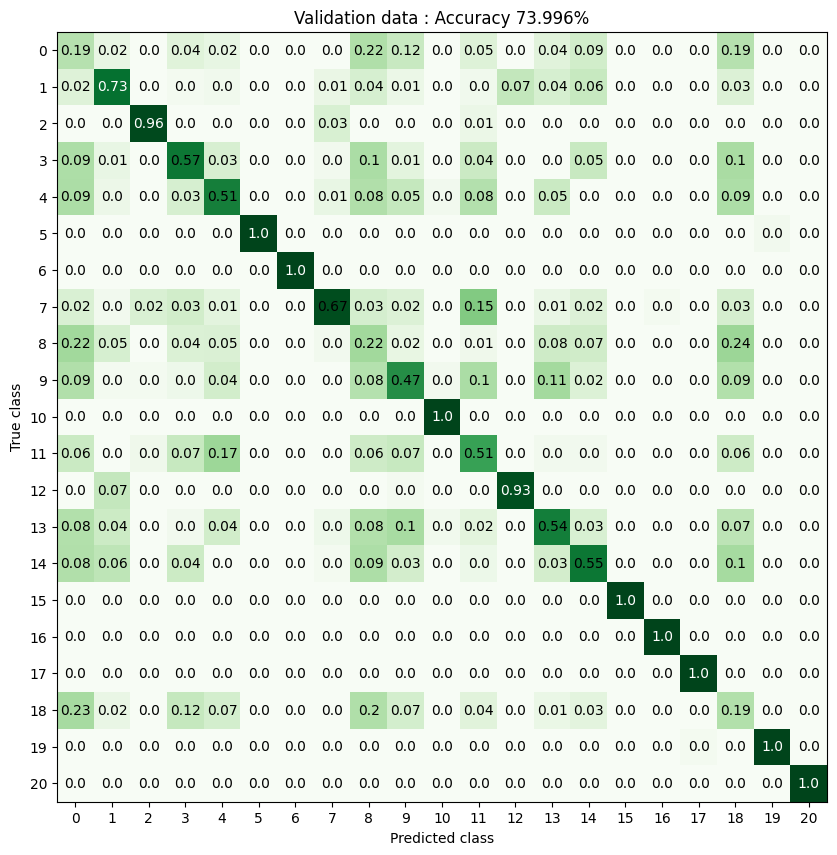

In [7]:

predict = clf_svm.predict(LDA_vald.drop('target',axis=1))

targets = vald_data['target'].unique().tolist()
numbers = targets
truth = labels_vald 

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='Validation data',save_fig_name='LDA-SVM Validation confusion matrix.pdf',eval_labels = False)
pass

# Confusion matrix for test data

In [8]:
#Prediction the classes for the testning data, for the SVM classifer trained on the training data.
predict_tst = clf_svm.predict(LDA_tst.drop('target',axis=1))
#Getting labels for testing data:
labels_tst = test_data['target']

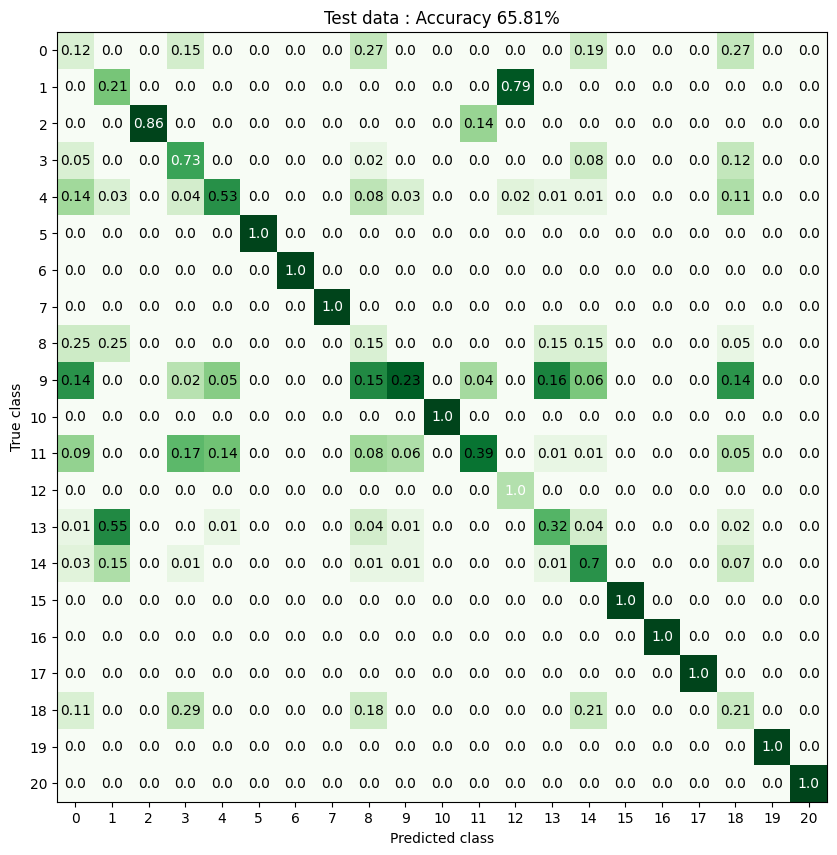

In [9]:

numbers=test_data['target'].unique().tolist()
#numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict_tst,truth):
    conf_matrix[int(x)][int(y)] +=1
    
    
eval_labels = False
#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),title='Test data',save_fig_name='LDA-SVM confusion matrix test.pdf',eval_labels = False)
pass